<a href="https://colab.research.google.com/github/FozilovDiyorbek/Qilingan-loyihalar/blob/main/A_model_that_determines_employee_retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/HR_capstone_dataset.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df['left'].value_counts()

,count
left,
0,11428
1,3571


In [ ]:
df['Department'].value_counts()

,count
Department,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [ ]:
df['salary'].value_counts()

,count
salary,
low,7316
medium,6446
high,1237


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# Handling text columns

In [5]:
ordinal_encoder = OrdinalEncoder()
encoder = ordinal_encoder.fit_transform(df[['salary','Department']])

In [6]:
df[['salary','Department']] = encoder

In [9]:
###CORRELATION
df.corrwith(df['left']).sort_values(ascending=False)

,0
left,1.000000
time_spend_company,0.144822
average_montly_hours,0.071287
Department,0.032105
number_project,0.023787
last_evaluation,0.006567
salary,-0.001294
promotion_last_5years,-0.061788
Work_accident,-0.154622
satisfaction_level,-0.388375


# Data preparation

In [10]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
x_train = train_set.drop('left', axis=1)
y_train = train_set['left']

In [12]:
standard_scaler = StandardScaler()
x_prepared = standard_scaler.fit_transform(x_train)

In [13]:
x_test = test_set.drop('left', axis=1)
y_test = test_set['left']

In [15]:
x_test_prepared = standard_scaler.transform(x_test)

# Create a model

DECISION TREE

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2294
           1       0.93      0.97      0.95       706

    accuracy                           0.97      3000
   macro avg       0.96      0.97      0.97      3000
weighted avg       0.98      0.97      0.97      3000

Model accuracy: 0.9746666666666667


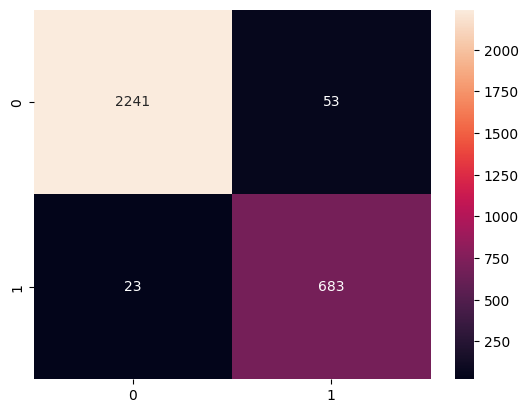

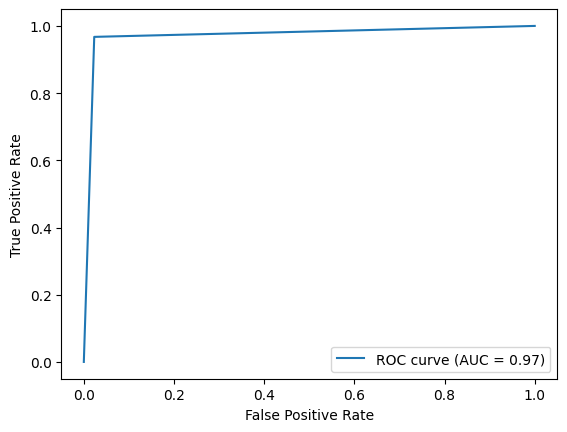

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(x_prepared, y_train)

# Let's evaluate the model
y_predict = tree_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model accuracy:", metrics.accuracy_score(y_test,y_predict))

###CONFUCION MATRIX
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

RANDOM FOREST

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Model aniqligi: 0.9886666666666667


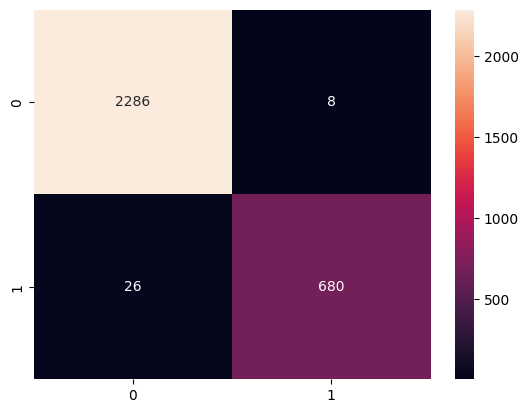

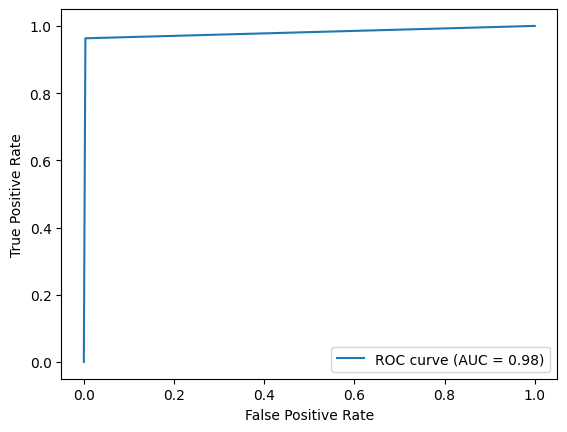

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_prepared, y_train)

# Modelni baholaymiz
y_predict = RF_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

###CONFUCION MATRIX
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

Support Vector Machines

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2294
           1       0.93      0.90      0.91       706

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.94      3000
weighted avg       0.96      0.96      0.96      3000

Model aniqligi: 0.9593333333333334


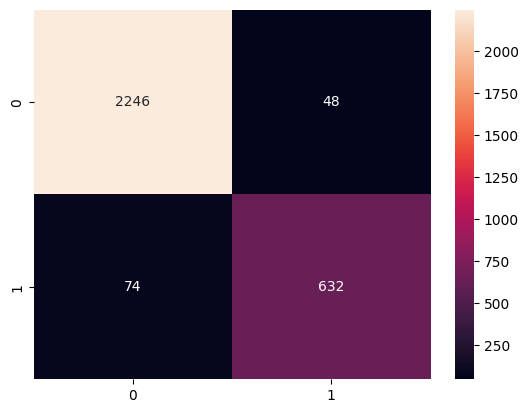

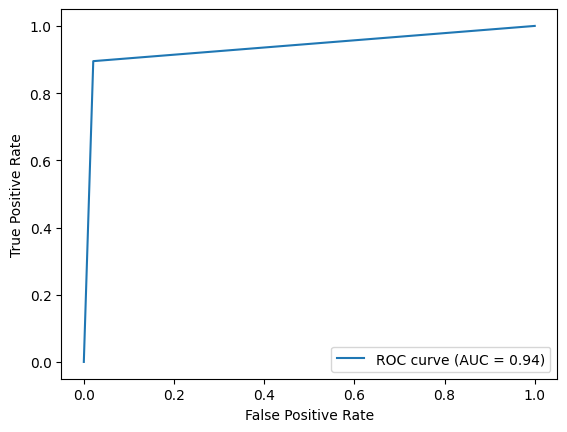

In [18]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_prepared, y_train)

# Modelni baholaymiz
y_predict = svm_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

###CONFUCION MATRIX
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

Model aniqligi: 0.7576666666666667


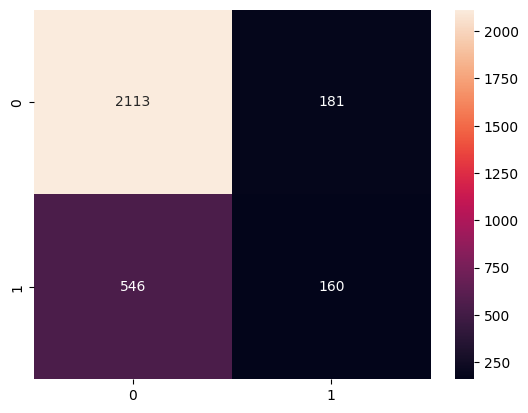

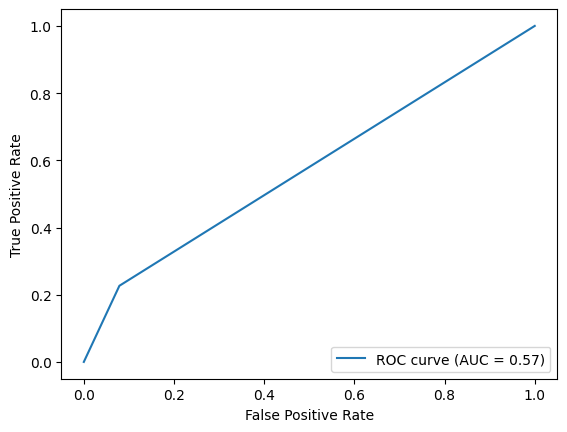

In [19]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_prepared, y_train)

# Modelni baholaymiz
y_predict = LR_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

KNN METOD

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

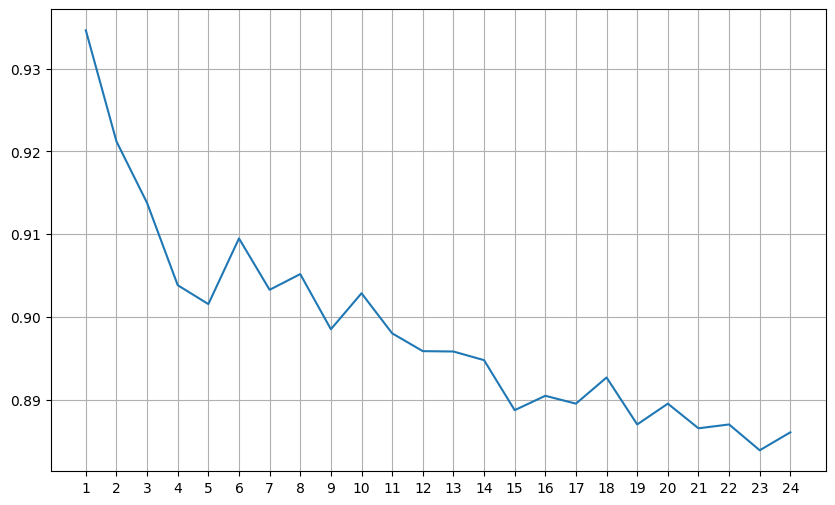

In [21]:
### CHOOSING THE BEST VALUE OF K
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) ## Value of K
    knn.fit(x_prepared, y_train)
    y_predict = knn.predict(x_test_prepared)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

GRID SEARCH

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(x_prepared, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [23]:
knn_gscv.cv_results_['rank_test_score']

array([ 1,  2,  4,  3,  8,  5,  7,  6, 10,  9, 12, 11, 14, 13, 16, 15, 18,
       17, 19, 20, 22, 21, 23, 24], dtype=int32)

In [24]:
knn_gscv.best_params_

{'n_neighbors': 1}

The best value of K = 1

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2294
           1       0.92      0.95      0.93       706

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000

Model aniqligi: 0.9686666666666667


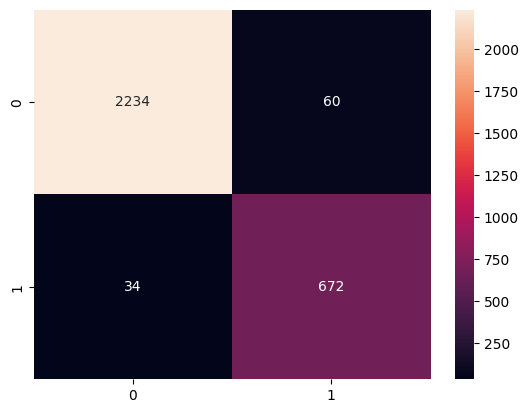

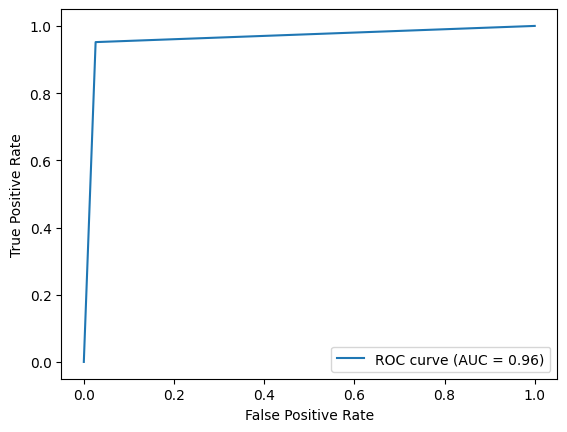

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_prepared, y_train)

# Modelni baholaymiz
y_predict = knn.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# BEST RESULT IS RANDOM FOREST MODEL

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000

Model aniqligi: 0.9883333333333333


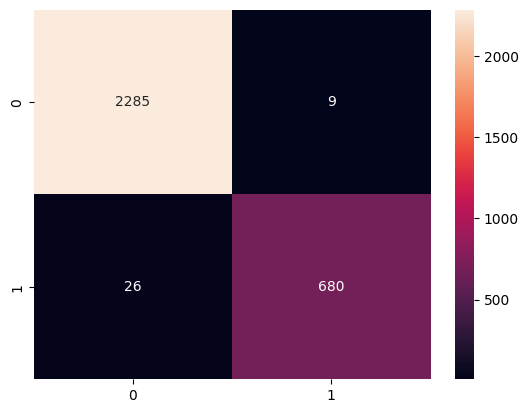

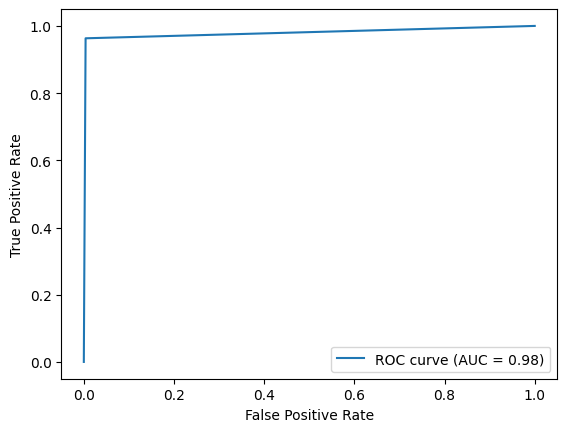

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_prepared, y_train)

# Modelni baholaymiz
y_predict = RF_model.predict(x_test_prepared)
print(metrics.classification_report(y_test, y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))

###CONFUCION MATRIX
conf_mat = metrics.confusion_matrix(y_test, y_predict)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()